In [6]:
# 跳读分析
# 本章节使用简单的base模型对比来获得特征上的启发

In [10]:
%load_ext autoreload
%autoreload 2
from model import PredictAndEvaluteBaseModel, PredictAndEvaluteBaseModelForSkipData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# 读入跳读的纠正和非纠正的两个数据集
import pandas as pd
data_with_correct = pd.read_csv("data/final_data/all-word-feature-20240723-103-with-correct.csv") # 有纠正全集
data_without_correct = pd.read_csv("data/final_data/all-word-feature-20240723-103.csv") # 无纠正全集
corrected_data_not_skip = pd.read_csv("data/final_data/word-feature-with-correct-not-skip.csv") # 有纠正非跳读
not_corrected_data_not_skip = pd.read_csv("data/final_data/word-feature-without-correct-not-skip.csv") # 无纠正非跳读
corrected_data_skip = pd.read_csv("data/final_data/word-feature-with-correct-skip.csv") # 纠正跳读
not_corrected_data_skip = pd.read_csv("data/final_data/word-feature-without-correct-skip.csv") # 无纠正跳读


In [9]:
# 比较预处理对非跳读的影响
# 结论：预处理对非跳读数据能带来显著提升

In [7]:
# 有预处理
PredictAndEvaluteBaseModel(corrected_data_not_skip, False).predict()

              precision    recall  f1-score   support

           0       0.50      0.18      0.26       203
           1       0.98      1.00      0.99      9221

    accuracy                           0.98      9424
   macro avg       0.74      0.59      0.63      9424
weighted avg       0.97      0.98      0.97      9424

AUC: 0.8796236690398815


/Users/bytedance/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# 无预处理
PredictAndEvaluteBaseModel(not_corrected_data_not_skip, False).predict()

              precision    recall  f1-score   support

           0       0.38      0.10      0.16       203
           1       0.98      1.00      0.99      9221

    accuracy                           0.98      9424
   macro avg       0.68      0.55      0.58      9424
weighted avg       0.97      0.98      0.97      9424

AUC: 0.8749208676062298


/Users/bytedance/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# 比较预处理对跳读的影响
# 结论：预处理对跳读有性能损失，但是损失不大

In [13]:
# 预处理跳读
PredictAndEvaluteBaseModelForSkipData(corrected_data_skip)

              precision    recall  f1-score   support

           0       0.32      0.17      0.22        35
           1       0.98      0.99      0.99      1911

    accuracy                           0.98      1946
   macro avg       0.65      0.58      0.61      1946
weighted avg       0.97      0.98      0.98      1946

AUC: 0.8555879494655004


In [14]:
# 无预处理跳读
PredictAndEvaluteBaseModelForSkipData(not_corrected_data_skip)

              precision    recall  f1-score   support

           0       0.35      0.20      0.25        35
           1       0.99      0.99      0.99      1911

    accuracy                           0.98      1946
   macro avg       0.67      0.60      0.62      1946
weighted avg       0.97      0.98      0.98      1946

AUC: 0.8282200792404872


In [16]:
# 换个切入点，看跳读本身存在什么样的特征，如何去理解

In [24]:
# 现象1，跳读中存在大量的不懂的单词，fixation_duration为0
# 结论：不论在跳读还是非跳读下，预处理都减少了不懂情况下fixation_duration=0的比例

In [20]:
len(corrected_data_skip[(corrected_data_skip['word_understand']==0)&(corrected_data_skip['fixation_duration']==0)]) / len(corrected_data_skip[(corrected_data_skip['word_understand']==0)])

0.19289340101522842

In [21]:
len(not_corrected_data_skip[(not_corrected_data_skip['word_understand']==0)&(not_corrected_data_skip['fixation_duration']==0)]) / len(not_corrected_data_skip[(not_corrected_data_skip['word_understand']==0)])

0.2131979695431472

In [22]:
len(corrected_data_not_skip[(corrected_data_not_skip['word_understand']==0)&(corrected_data_not_skip['fixation_duration']==0)]) / len(corrected_data_not_skip[(corrected_data_not_skip['word_understand']==0)])

0.09734513274336283

In [23]:
len(not_corrected_data_not_skip[(not_corrected_data_not_skip['word_understand']==0)&(not_corrected_data_not_skip['fixation_duration']==0)]) / len(not_corrected_data_not_skip[(not_corrected_data_not_skip['word_understand']==0)])

0.10324483775811209

In [26]:
# 查看跳读情况都什么情况会不懂且为0呢？
# 如果这些异常case都正常了，那性能会提升多少

[666, 2290, 1287, 1606, 1012, 622, 1767, 0, 1077, 544, 1032, 1441, 831, 637, 624, 0, 882, 0, 475, 264, 0, 519, 414, 0, 200, 0, 206, 0, 1471, 216, 823, 366, 0, 721, 863, 0, 0, 0, 1307, 1173, 781, 378, 1861, 1460, 875, 1156, 0, 0, 0, 700, 2187, 227, 792, 748, 1093, 1201, 0, 509, 0, 0, 866, 0, 0, 272, 0, 673, 0, 1704, 1110, 1235, 1501, 1850, 1132, 3402, 897, 0, 703, 431, 1293, 0, 772, 1047, 0, 660, 1301, 1072, 2823, 3037, 3109, 7765, 1078, 1907, 860, 3960, 4110, 3915, 2598, 4419, 3911, 902, 2467, 0, 0, 216, 3654, 1918, 437, 2506, 0, 1234, 530, 500, 0, 956, 0, 0, 1362, 340, 458, 435, 453, 675, 623, 902, 2614, 1350, 1025, 1506, 1911, 1181, 1298, 513, 653, 1796, 319, 419, 680, 579, 562, 1839, 869, 1052, 0, 612, 585, 1220, 424, 311, 1561, 1120, 839, 1596, 927, 440, 1105, 480, 0, 451, 1447, 458, 1679, 1229, 5724, 3031, 3525, 3438, 2769, 1313, 638, 632, 1002, 900, 1970, 2304, 2688, 1922, 327, 371, 0, 0, 439, 308, 1415, 0, 0, 0, 1260, 1442, 571, 2281, 619, 0, 279, 1635, 551, 924, 212]


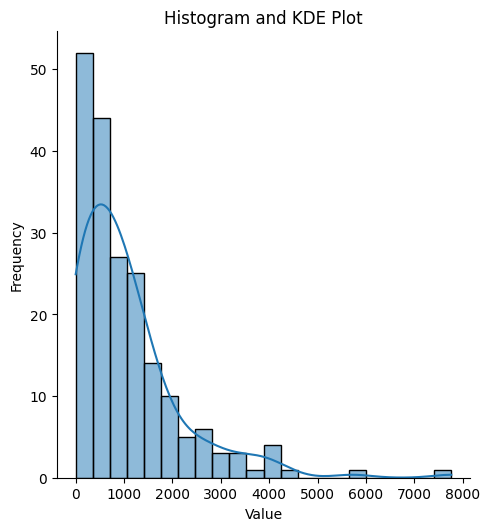

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

data = [row['fixation_duration'] for idx, row in skip_with_correct[(skip_with_correct['word_understand']==0)].iterrows()]
print(data)
sns.displot(data, kde=True)  # kde=True 表示同时绘制核密度估计图
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram and KDE Plot')
plt.show()

In [15]:
skip_with_correct = pd.read_csv('data/final_data/word-feature-with-correct-skip.csv')
len(skip_with_correct[(skip_with_correct['word_understand']==0) & (skip_with_correct['fixation_duration']==0)]) / len(skip_with_correct[(skip_with_correct['word_understand']==0)])

0.19289340101522842

In [13]:
# 挑case看看
skip_with_correct[(skip_with_correct['word_understand']==0) & (skip_with_correct['fixation_duration']==0)]


,Unnamed: 0,exp_id,article_id,time,page_id,user,sentence_id,word,word_understand,sentence_understand,mind_wandering,reading_times,number_of_fixations,fixation_duration,fixation_duration_div_syllable,fixation_duration_div_length,fixation_duration_diff,number_of_fixations_diff,reading_times_diff
462,6394,1055,29,0,1795,czh,3,makeshift,0,1,1,0,0,0,0.0,0.0,-270,-1,-1
902,6834,1071,6,0,1819,xuhailin,3,thrive,0,0,0,0,0,0,0.0,0.0,0,0,0
1001,6933,1071,6,0,1819,xuhailin,6,infusing,0,1,1,0,0,0,0.0,0.0,0,0,0
1251,9479,1130,16,0,1929,liuyiting,3,algebra,0,1,1,0,0,0,0.0,0.0,0,0,0
1344,9572,1130,16,0,1929,liuyiting,10,citizen,0,0,1,0,0,0,0.0,0.0,0,0,0
1368,9596,1130,16,0,1929,liuyiting,11,illiteracy,0,1,1,0,0,0,0.0,0.0,-483,-1,-1
1417,10717,1145,36,0,1952,梁胃寒,2,territorial,0,1,1,0,0,0,0.0,0.0,0,0,0
1617,11209,1149,50,0,1959,dongfang,6,attitudes,0,1,1,0,0,0,0.0,0.0,-366,-1,-1
1864,12169,1156,15,0,1981,ln,0,deflect,0,1,1,0,0,0,0.0,0.0,0,0,0
1917,12550,1158,45,0,1985,ln,1,upshot,0,1,1,0,0,0,0.0,0.0,0,0,0


In [34]:
# 做个实验，把这些fixation都改为非0的一个大值，看看性能是否会提升
import pandas as pd
skip_with_correct = pd.read_csv('data/final_data/word-feature-with-correct-skip.csv')
# data = {'word_understand': [0, 1], 'fixation_duration': [0, 200], 'num_of_fixations': [0, 3], 'eading_times': [0, 4]}
skip_with_correct = pd.DataFrame(skip_with_correct)

skip_with_correct.loc[(skip_with_correct['word_understand'] == 0) & (skip_with_correct['fixation_duration'] == 0), 'fixation_duration'] = 100000
skip_with_correct.loc[(skip_with_correct['word_understand'] == 0) & (skip_with_correct['fixation_duration'] == 0), 'num_of_fixations'] = 500
skip_with_correct.loc[(skip_with_correct['word_understand'] == 0) & (skip_with_correct['fixation_duration'] == 0), 'eading_times'] = 3000

len(skip_with_correct[(skip_with_correct['word_understand']==0) & (skip_with_correct['fixation_duration']==0)]) / len(skip_with_correct[(skip_with_correct['word_understand']==0)])
# skip_with_correct
skip_with_correct.to_csv('data/final_data/word-feature-with-correct-skip-experiement-data.csv')

In [12]:
not_skip_with_correct = pd.read_csv('data/final_data/word-feature-with-correct-not-skip.csv')
len(not_skip_with_correct[(not_skip_with_correct['word_understand']==0) & (not_skip_with_correct['fixation_duration']==0)]) / len(not_skip_with_correct[not_skip_with_correct['fixation_duration']==0])

0.0051506165131887

[1336, 1322, 1050, 783, 1100, 841, 1745, 1140, 1676, 1543, 653, 514, 2970, 2343, 1220, 312, 202, 1367, 868, 2638, 1433, 800, 2662, 1644, 2069, 1408, 3753, 1858, 543, 1091, 1842, 743, 1104, 582, 1838, 1276, 821, 0, 949, 501, 0, 516, 0, 1835, 838, 1828, 1794, 0, 1646, 771, 1379, 3441, 793, 1711, 397, 1795, 214, 1648, 888, 1379, 0, 1303, 2299, 538, 1772, 1426, 385, 222, 2014, 203, 2710, 1200, 3097, 586, 402, 1849, 934, 1513, 1514, 1665, 1432, 1107, 859, 1073, 604, 1218, 989, 731, 1514, 905, 2202, 1638, 1218, 2382, 914, 1957, 583, 1922, 495, 640, 0, 451, 887, 0, 1719, 3018, 2742, 777, 1056, 2452, 1220, 1829, 1497, 1072, 1883, 896, 1456, 880, 1915, 2154, 1407, 660, 2047, 2171, 1132, 927, 889, 1644, 1022, 1584, 0, 0, 0, 2329, 2922, 1456, 1462, 2022, 2067, 1456, 2579, 6247, 2388, 1611, 1161, 3817, 3665, 1540, 440, 810, 1221, 0, 1744, 1983, 0, 0, 334, 1862, 1145, 1786, 2581, 992, 2942, 2344, 1904, 948, 1940, 5071, 4362, 2237, 1380, 2614, 1421, 1016, 1394, 2205, 1407, 762, 1211, 2097, 1700, 0, 

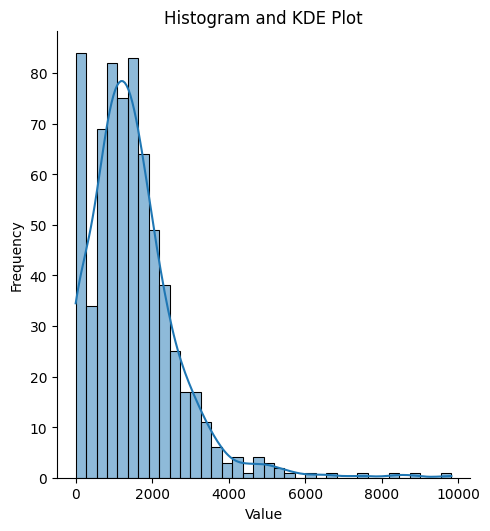

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

data = [row['fixation_duration'] for idx, row in not_skip_with_correct[(not_skip_with_correct['word_understand']==0)].iterrows()]
print(data)
sns.displot(data, kde=True)  # kde=True 表示同时绘制核密度估计图
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram and KDE Plot')
plt.show()

In [14]:
# 按照 exp_id 进行分组，并对其他列进行聚合操作
aggregated_df = df.groupby('exp_id').agg({
    'reading_times': 'sum',         # 其他数值型特征可以选择求和、平均值等操作
    'number_of_fixations': 'sum',
    'fixation_duration': 'sum',
    'fixation_duration_div_syllable': 'sum',
    'fixation_duration_div_length': 'sum',
    'fixation_duration_diff': 'sum',
    'number_of_fixations_diff': 'sum',
    'reading_times_diff': 'sum'
}).reset_index()

# 查看聚合后的数据
print(aggregated_df)

NameError: name 'df' is not defined

In [8]:
# 按照 fixation_duration 列降序排序，并选择只显示 exp_id 列
sorted_exp_ids = aggregated_df.sort_values(by='fixation_duration', ascending=False)['exp_id']
lens = int(len(sorted_exp_ids) * 0.8)
not_skip_ids = sorted_exp_ids[:lens]
skip_ids = sorted_exp_ids[lens:len(sorted_exp_ids)]
# 打印排序后的 exp_id
print(len(not_skip_ids))
print(not_skip_ids)

26
20    1073
4      630
21    1074
12     970
19    1072
3      598
11     965
22    1090
18    1071
23    1091
5      641
24    1129
14    1011
27    1144
7      903
15    1014
1      590
2      597
8      904
31    1151
0      585
13     972
29    1146
28    1145
30    1149
9      941
Name: exp_id, dtype: int64


In [9]:
not_skip_data = df[df['exp_id'].isin(not_skip_ids)]
not_skip_data

,exp_id,word,word_understand,reading_times,number_of_fixations,fixation_duration,fixation_duration_div_syllable,fixation_duration_div_length,fixation_duration_diff,number_of_fixations_diff,reading_times_diff
0,585,a,1,0,0,0,0.0,0.0,0,0,0
1,585,judge,1,1,3,927,927.0,185.4,927,3,1
2,585,in,1,1,1,245,245.0,122.5,-682,-2,0
3,585,the,1,0,0,0,0.0,0.0,-245,-1,-1
4,585,us,1,1,1,321,321.0,160.5,321,1,1
...,...,...,...,...,...,...,...,...,...,...,...
11859,1151,be,1,0,0,0,0.0,0.0,0,0,0
11860,1151,specified,1,0,0,0,0.0,0.0,0,0,0
11861,1151,in,1,0,0,0,0.0,0.0,0,0,0
11862,1151,computational,1,0,0,0,0.0,0.0,0,0,0


In [10]:
skip_data = df[df['exp_id'].isin(skip_ids)]
skip_data

,exp_id,word,word_understand,reading_times,number_of_fixations,fixation_duration,fixation_duration_div_syllable,fixation_duration_div_length,fixation_duration_diff,number_of_fixations_diff,reading_times_diff
2302,902,senior,1,0,0,0,0.000000,0.000000,0,0,0
2303,902,iranian,1,1,1,215,71.666667,30.714286,215,1,1
2304,902,figures,1,0,0,0,0.000000,0.000000,-215,-1,-1
2305,902,have,1,1,2,818,818.000000,204.500000,818,2,1
2306,902,expressed,1,1,1,292,146.000000,32.444444,-526,-1,0
...,...,...,...,...,...,...,...,...,...,...,...
12167,1156,enough,1,0,0,0,0.000000,0.000000,0,0,0
12168,1156,to,1,0,0,0,0.000000,0.000000,0,0,0
12169,1156,deflect,0,0,0,0,0.000000,0.000000,0,0,0
12170,1156,its,1,0,0,0,0.000000,0.000000,0,0,0


In [11]:
sequenceDataModel = PredictAndEvalute(not_skip_data, False)
sequenceDataModel.predict()

/tmp/ipykernel_112942/1488859566.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['word'] = self.df['word'].apply(self.clean_text)


              precision    recall  f1-score   support

           0       0.53      0.17      0.26        52
           1       0.99      1.00      0.99      2924

    accuracy                           0.98      2976
   macro avg       0.76      0.59      0.63      2976
weighted avg       0.98      0.98      0.98      2976

AUC: 0.8667262969588551


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
skipDataModel = PredictAndEvalute(skip_data, False)
skipDataModel.predict()

/tmp/ipykernel_112942/1488859566.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['word'] = self.df['word'].apply(self.clean_text)


              precision    recall  f1-score   support

           0       0.67      0.08      0.15        24
           1       0.97      1.00      0.98       653

    accuracy                           0.97       677
   macro avg       0.82      0.54      0.57       677
weighted avg       0.96      0.97      0.95       677

AUC: 0.8219754977029097


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 数据分析
# 目标：分析跳读性能低的原因

In [30]:
# 之前存储的跳读的预测的数据
import pandas as pd
skip_data = pd.read_csv('skip_data_predict.csv')
sequnece_data = pd.read_csv('not_skip_predicted.csv')
recall_data = skip_data[(skip_data['predicted_label']==1)&(skip_data['true_label']==0)]
pd.set_option('display.max_rows', 15)
recall_data


,exp_id,reading_times,number_of_fixations,fixation_duration,fixation_duration_div_syllable,fixation_duration_div_length,fixation_duration_diff,number_of_fixations_diff,reading_times_diff,word,predicted_label,true_label
10,902,2,3,821,410.50,117.285714,821,3,2,custody,1,0
36,902,0,0,0,0.00,0.000000,0,0,0,probe,1,0
49,902,1,2,949,237.25,94.900000,725,1,0,repetition,1,0
63,902,1,1,501,501.00,83.500000,501,1,1,jailed,1,0
159,902,0,0,0,0.00,0.000000,-991,-3,-3,assaulted,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2192,1156,1,2,791,395.50,87.888889,191,1,0,scuffling,1,0
2203,1156,2,2,1073,1073.00,214.600000,499,1,1,probe,1,0
2206,1156,1,2,642,214.00,80.250000,642,2,1,asteroid,1,0
2223,1156,3,4,1691,845.50,241.571429,1424,3,2,sizable,1,0


In [36]:
import matplotlib.pyplot as plt
def plot_hist(barData):
    plt.hist(barData, bins=10, edgecolor='black', density=True)  # density=True makes the y-axis show proportions
    plt.xlabel('Fixation duration')
    plt.ylabel('Proportion')
    plt.title('Distribution of Predict')
    plt.grid(True)
    plt.show()

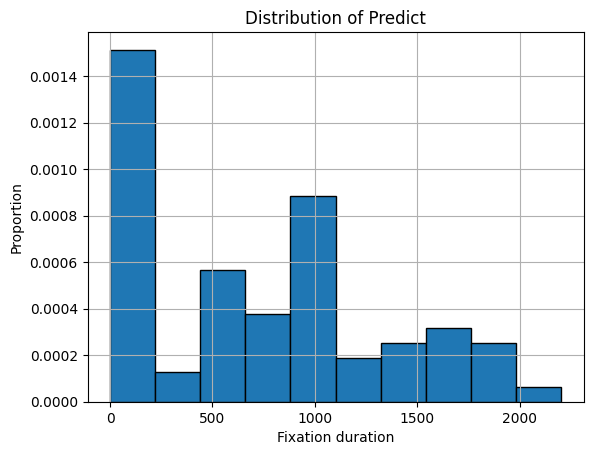

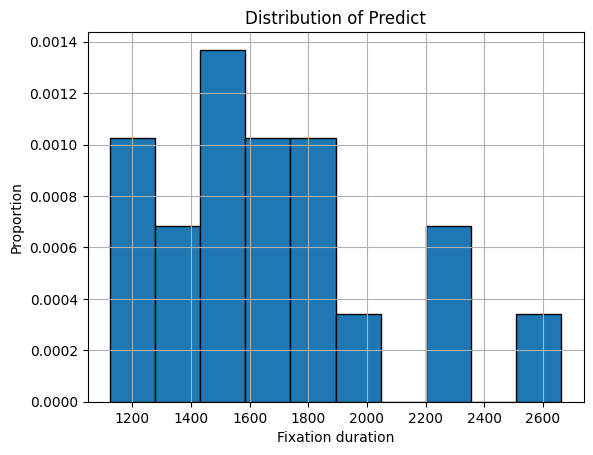

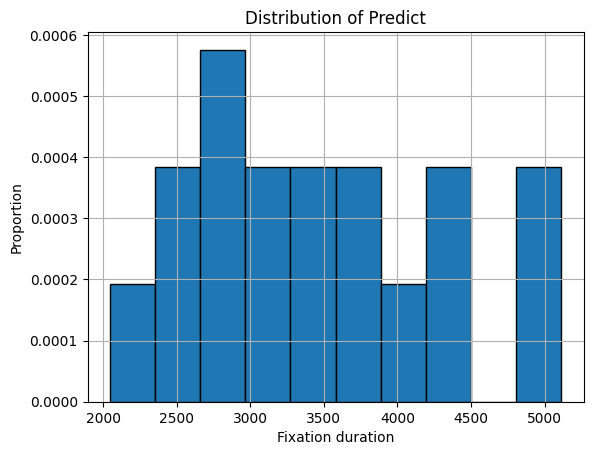

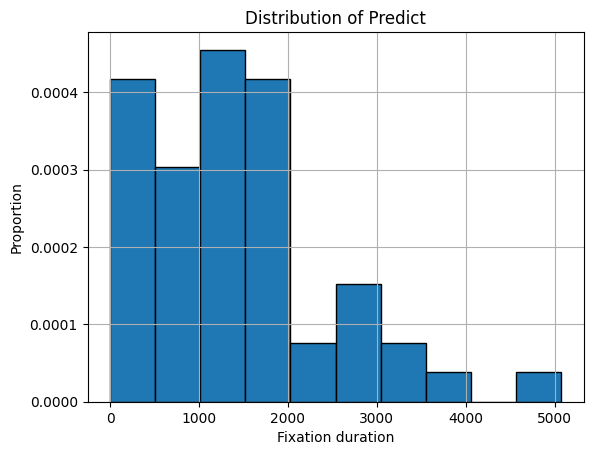

In [38]:
# 查看跳读数据中真实不懂的label的特征分布，和预测为不懂的分布差异
skipNotUnderStandTrueLabelData = skip_data[skip_data['true_label']==0]['fixation_duration']
skipNotUnderStandPredictLabelData = skip_data[skip_data['predicted_label']==0]['fixation_duration']
sequenceNotUnderStandTrueLabelData = sequnece_data[sequnece_data['y_pred']==0]['fixation_duration']
sequenceNotUnderStandPredictLabelData = sequnece_data[sequnece_data['y_label']==0]['fixation_duration']
plot_hist(skipNotUnderStandTrueLabelData)
plot_hist(skipNotUnderStandPredictLabelData)
plot_hist(sequenceNotUnderStandTrueLabelData)
plot_hist(sequenceNotUnderStandPredictLabelData)



In [54]:
# 看一下预测错了的predict为0的占比
allWrongRecallData = skip_data[(skip_data['predicted_label']==1)&(skip_data['true_label']==0)]
allWrongRecallDataWithoutFixation = allWrongRecallData[allWrongRecallData['fixation_duration']==0]
len(allWrongRecallDataWithoutFixation) / len(allWrongRecallData)

0.3333333333333333

In [56]:
# 顺序阅读数据呢？
allWrongRecallSequenceData = sequnece_data[(sequnece_data['y_pred']==1)&(sequnece_data['y_label']==0)]
allWrongRecallSequenceDataWithoutFixation = allWrongRecallSequenceData[allWrongRecallSequenceData['fixation_duration']==0]
len(allWrongRecallSequenceDataWithoutFixation) / len(allWrongRecallSequenceData)

0.11627906976744186

In [57]:
# 差距还是比较大的
# 说明在